In [39]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Algorytm Dijkstry-Prima

## Drzewo rozpinajace grafu

**Drzewo** - graf acykliczny i spojny.

## Przyklad

Mamy polaczyc siecia lacznosc n miast, gdzie znane sa koszty polaczen miedzy miastami. Poszukiwane rozwiazanie ma minimalizowac sumaryczny koszt realizacji sieci.

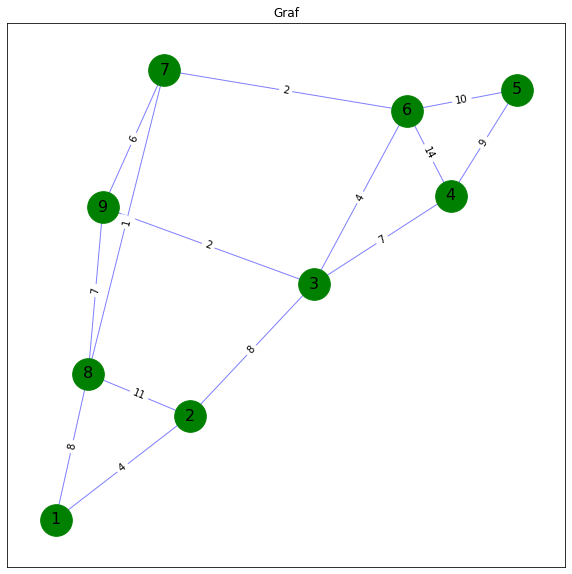

In [40]:
"""
a - 1
b - 2
c - 3
d - 4
e - 5
f - 6
g - 7
h - 8
i - 9
"""


weights = [
    (1, 2, 4),
    (1, 8, 8),
    (2, 8, 11),
    (3, 2, 8),
    (3, 9, 2),
    (3, 6, 4),
    (3, 4, 7),
    (4, 5, 9),
    (4, 6, 14),
    (5, 6, 10),
    (6, 7, 2),
    (7, 9, 6),
    (7, 8, 1),
    (8, 9, 7),
]


G = nx.Graph()

G.add_weighted_edges_from(weights)
# G = nx.connected_watts_strogatz_graph(10, 3, 1)
# G = nx.fast_gnp_random_graph(10, 0.7)
# G = nx.gnp_random_graph(10, 0.7)
# G = nx.random_k_out_graph(50, 2, 0.5, self_loops=False)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graf")
plt.show()

In [52]:
def primsAlgorithm(G):
    INF = np.inf
    N = G.number_of_nodes()
    M = nx.to_numpy_array(G)
    sst_edges = []

    selected_node = [0 for _ in range(N)]

    no_edge = 0

    selected_node[0] = True

    # printing for edge and weight
    # print("Edge : Weight\n")
    while (no_edge < N - 1):
        
        minimum = INF
        a = 0
        b = 0
        for m in range(N):
            if selected_node[m]:
                for n in range(N):
                    if ((not selected_node[n]) and M[m][n]):  
                        # not in selected and there is an edge
                        if minimum > M[m][n]:
                            minimum = M[m][n]
                            a = m
                            b = n
        # print(str(a) + "-" + str(b) + ":" + str(M[a][b]))
        sst_edges.append((a+1, b+1))
        selected_node[b] = True
        no_edge += 1
    return sst_edges

In [53]:
sst_edges = primsAlgorithm(G)
sst_edges

[(1, 2), (1, 3), (3, 9), (9, 6), (6, 4), (4, 5), (4, 7), (7, 8)]

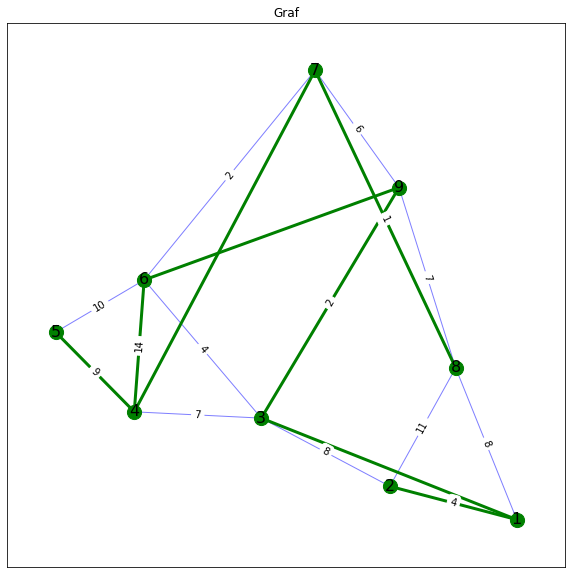

In [61]:
fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='g', node_size=200)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=sst_edges, width=3, alpha=1, edge_color='g')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graf")
plt.show()